In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [7]:
X , y = make_blobs(n_samples=100, centers=4, random_state=42)

In [8]:
X.shape, y.shape

((100, 2), (100,))

In [10]:
(y==3).astype(int)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

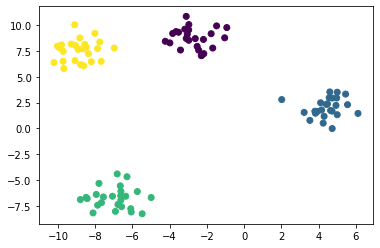

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [73]:
class CustomLogisticReg:
    def __init__(self, lr=.01, iters=100):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        self.classes_ = np.unique(y)
        
        thetas = []
        
        for klass in self.classes_:
            
            theta = np.random.randn(X.shape[1], 1)

            errors = []

            for i in range(self.iters):
                error = self.gradient_decend(X, (y==klass).astype(int), theta)
                errors.append(error)

            thetas.append(theta)   
        self.thetas_ = np.hstack(thetas)
    
    def gradient_decend(self, X, y, theta):
        delta_theta, error = self.gradient(X, y, theta)
        theta += delta_theta
        return error
    
    def gradient(self, X, y, theta):
        ya = y.reshape(-1, 1)   # reshape of y because actual y shape is (100,) which needed to be convert over (100, 1)
        yh = self.hypo(X, theta)
        
        dneglldt = np.dot(X.T,(yh-ya))/len(X)
       
        delta_theta = -dneglldt*self.lr
       
        error = -np.mean((ya * np.log(yh)) + ((1-ya)*np.log(1-yh)))
        return delta_theta, error
        
    def hypo(self, X, theta):
        g = np.dot(X, theta)
        return 1/ (1 + np.exp(-g))
    
    def predict_prob(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        return self.hypo(X, self.thetas_)
       
    def predict(self, X):
        probs = self.predict_prob(X) 
        return probs.argmax(axis=1)
        
    def score(self, X, y):
        yp = self.predict(X)
        
        return np.mean(yp==y)

In [74]:
model = CustomLogisticReg(iters=1000)

In [75]:
errors = model.fit(X, y)

In [76]:
model.thetas_

array([[-0.87697289, -0.44847506, -0.97178207, -1.79626191],
       [ 0.12666979,  1.12924068, -0.29921282, -0.20347889],
       [ 0.1828793 , -0.18523453, -0.97466372,  0.10911823]])

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
X.shape

(100, 2)

In [80]:
model = CustomLogisticReg(lr=.1, iters=1000)

In [81]:
model.fit(X_train, y_train)

In [82]:
model.score(X_test, y_test)

1.0

In [83]:
model.thetas_

array([[-5.40908440e+00, -7.03157189e-01,  1.21349656e-03,
        -5.98094686e+00],
       [ 3.36800099e-01,  1.94997209e+00, -6.83993081e-01,
        -6.78416345e-01],
       [ 8.78504692e-01, -2.25278146e-01, -1.81245955e+00,
         2.45363514e-01]])

In [84]:
model.predict_prob(X)

array([[2.74358516e-02, 8.40149331e-10, 1.97971766e-02, 8.82345873e-01],
       [4.66652979e-07, 2.24392338e-05, 9.99999993e-01, 2.07196435e-02],
       [8.79046622e-01, 1.72587593e-04, 2.30551206e-07, 1.65858820e-01],
       [4.89723917e-07, 7.35785291e-05, 9.99999993e-01, 1.34204423e-02],
       [2.07686047e-01, 5.51311269e-09, 2.05852683e-04, 8.46435293e-01],
       [4.55686630e-07, 5.73077919e-07, 9.99999994e-01, 7.80762967e-02],
       [2.41523800e-01, 9.99757956e-01, 1.59478850e-04, 1.78642731e-04],
       [1.33172540e-01, 9.99383701e-01, 7.12712262e-04, 2.23043368e-04],
       [2.26307637e-01, 9.99618512e-01, 1.89534107e-04, 2.09043002e-04],
       [8.33037297e-01, 4.74500228e-05, 4.97232542e-07, 2.32570392e-01],
       [8.29063996e-01, 1.64363828e-04, 5.30614041e-07, 1.58376885e-01],
       [3.56118904e-06, 4.04012835e-06, 9.99999567e-01, 5.54403805e-02],
       [1.61906571e-06, 9.00760298e-06, 9.99999915e-01, 3.61573546e-02],
       [2.82935253e-02, 9.97557096e-01, 2.13751325e